## Gradient Descent

Let's say we have an equation and its derivative : <br><br>
$f(x) = x^{2}$ &ensp; &ensp; &ensp; $\frac{dy}{dx} = 2x$<br><br>

We can get the lowest value of x using the equation : <br><br>
$x_{new} = x_{old} - \alpha(2x_{old})$ $
\begin{bmatrix}
\ 1 \\
\ 1 - 0.1(2)(1) = 0.8 \\
\ 0.8 - 0.1(2)(0.8) = 0.64 \\
\ 0.64 - 0.1(2)(0.64) = 0.512 \\
\vdots \\
\end{bmatrix}$

In [8]:
x = 10
derivative = []
y = []

for i in range(1000):
    old_value = x
    y.append(old_value ** 2)
    derivative.append(old_value - 0.01 * 2 * old_value)
    x = old_value - 0.01 * 2 * old_value

In [9]:
y[:20]

[100,
 96.04000000000002,
 92.23681600000002,
 88.5842380864,
 85.07630225817857,
 81.70728068875471,
 78.47167237348003,
 75.36419414749021,
 72.37977205924958,
 69.5135330857033,
 66.76079717550945,
 64.11706960735928,
 61.578033650907855,
 59.139543518331905,
 56.79761759500595,
 54.54843193824372,
 52.38831403348927,
 50.3137367977631,
 48.32131282057168,
 46.40778883287704]

Gradient descent is dependent on the running rate $\alpha$ and the number of loops. If $\alpha$ and running rate is too small, we will not be able to reach the minimum value, and it is time-inefficient.

Same is true if the parameters are too big.

## Linear Regression with Gradient Descent

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### 1. Load Dataset

In [2]:
#create a dataframe
df = pd.read_csv('slr06.csv')
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [10]:
#reshape the x_column
raw_X = df["X"].values.reshape(-1, 1)
y = df["Y"].values

In [11]:
raw_x.shape

(63, 1)

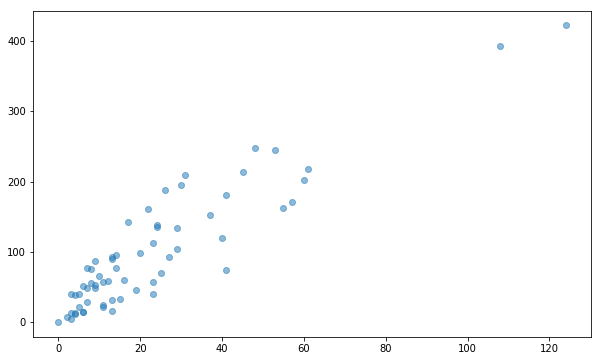

In [12]:
#plot the values
plt.figure(figsize=(10,6))
plt.plot(raw_X, y, 'o', alpha=0.5)

In [13]:
#preview the data points
raw_X[:5], y[:5]

(array([[108],
        [ 19],
        [ 13],
        [124],
        [ 40]]), array([392.5,  46.2,  15.7, 422.2, 119.4]))

In [14]:
#fill the first column of raw_X with ones
np.ones((len(raw_X),1))[:3]
X = np.concatenate( (np.ones((len(raw_X),1)), raw_X ), axis=1)
X[:5]

array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.]])

In [15]:
w = np.random.normal((2,1)) 
# w = np.array([5,3]) w is theta
w

array([0.73525775, 1.65912667])

**Note**: w[0] is the expected intercept and w[1] is the expected slope. The reason why we have the first column of X filled with ones is because we want to dot product X and w, where the first column of X is 1 and the first column of w is just the expected intercept (multiplication of the two yields just the intercept)

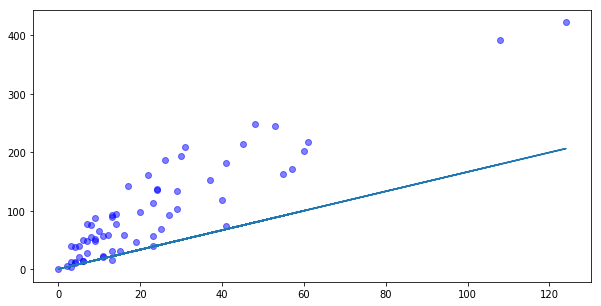

In [17]:
plt.figure(figsize=(10,5))
y_predict = np.dot(X, w)
plt.plot(raw_X,y,'o', color='blue', alpha=0.5) #raw_X and y are from the dataset we imported
plt.plot(raw_X,y_predict)

In [18]:
y_predict[:10]

array([179.92093824,  32.2586645 ,  22.30390448, 206.46696498,
        67.1003246 ,  95.30547801,  38.89517119,  23.96303115,
        75.39595796,  17.32652446])

### 2. Hypothesis and Cost Function

Hypothesis function : 
$$\large h_{\theta}(x^{(i)})$$

In [19]:
def hypothesis_function(X, theta):
    """
    input: matrix X and theta values
    output: expected values of y from matrix X and theta values
    """
    return X.dot(theta)

In [20]:
#a vector containing expected values of y from random weight values
# note that this is the same as y_predict values from section 1
h = hypothesis_function(X,w)
h[:10]

array([179.92093824,  32.2586645 ,  22.30390448, 206.46696498,
        67.1003246 ,  95.30547801,  38.89517119,  23.96303115,
        75.39595796,  17.32652446])

Cost function is as follows : 

$$\large J(w_0, w_1) = \large \frac{1}{2m} \sum\limits_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})^{2}$$

In [21]:
def cost_function(h, y):
    """
    input: hypothesis function and y-values
    output: cost_function output
    """
    return (1/(2*len(y))) * np.sum((h-y)**2)

In [22]:
h = hypothesis_function(X,w)
cost_function(h, y)

3218.704634974944

### 3. Gradient Descent

In [23]:
def gradient_descent(X, y, w, alpha, iterations):
    theta = w
    m = len(y)
    
    theta_list = [theta.tolist()]
    cost = cost_function(hypothesis_function(X, theta), y)
    cost_list = [cost]

    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])
        
        if i % 10== 0:
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)


    return theta, theta_list, cost_list

In [24]:
iterations = 10000
alpha = 0.001

theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
cost = cost_function(hypothesis_function(X, theta), y)

print("theta:", theta)
print('cost:', cost_function(hypothesis_function(X, theta), y))

theta: [19.87203441  3.41646758]
cost: 625.3747557643801


In [27]:
theta_list = np.array(theta_list)

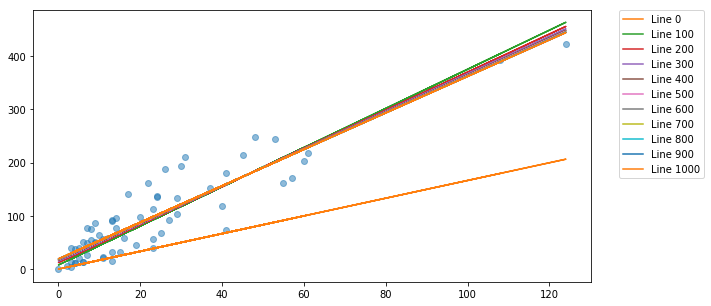

In [28]:
plt.figure(figsize=(10,5))

y_predict_step= np.dot(X, theta_list.transpose())

y_predict_step
plt.plot(raw_X,y,"o", alpha=0.5)
for i in range (0,len(cost_list),100):
    plt.plot(raw_X,y_predict_step[:,i], label='Line %d'%i)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()